In [ ]:
!pip install -U "flwr[simulation]" ray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.0/540.0 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: typer
    Found existing installation: typer 0.15.3
    Uninstalling typer-0.15.3

📌 Step 1: Upload the Dataset

🎯 Objective: Manually upload the PIMA Indian Diabetes dataset into Google Colab.

In [ ]:
from google.colab import files
import pandas as pd

# Prompt the user to upload the file manually
print("Please upload the dataset (diabetes.csv)")
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv("diabetes.csv")

# Display dataset info
print("Dataset Overview:")
print(df.info())

# Show first few rows
df.head()

Please upload the dataset (diabetes.csv)


Saving diabetes.csv to diabetes.csv
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

📌 Step 2: Identify and Handle Missing Values

🎯 Objective:
Identify missing values in critical features.
Replace zero values in specific columns (where zero is unrealistic) with NaN.
Analyze distributions to determine the best imputation strategy.

🔹 Step 2.1: Identify Missing Values

In [ ]:
import numpy as np

# Identify columns where 0 is an unrealistic value
cols_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with NaN
df[cols_with_missing_values] = df[cols_with_missing_values].replace(0, np.nan)

# Display missing values count before imputation
print("Missing Values Before Imputation:")
print(df.isnull().sum())

Missing Values Before Imputation:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


🔹 Step 2.2: Visualize Distributions of Columns with Missing Values

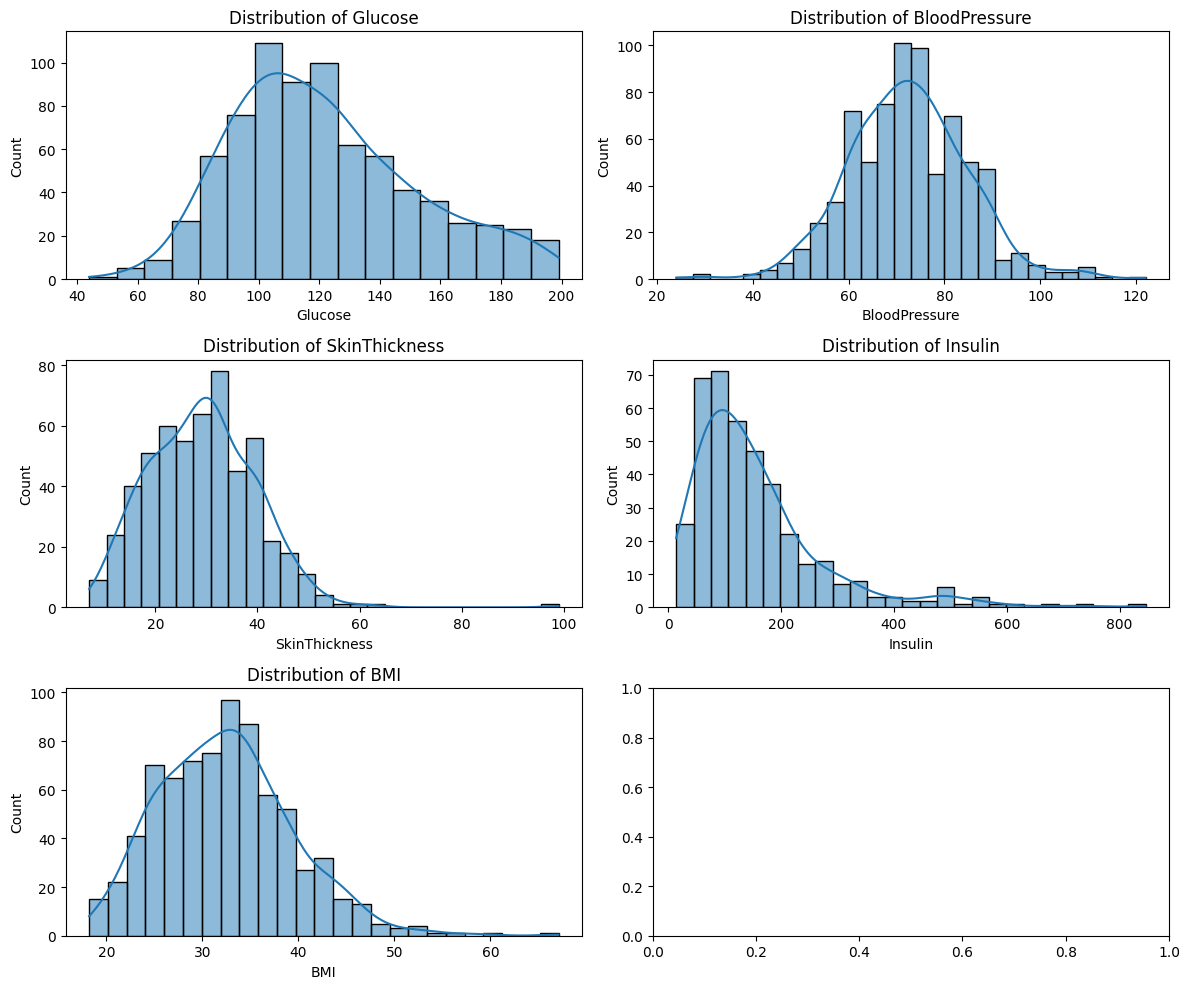

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing distributions of columns with missing values
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i, col in enumerate(columns_to_check):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

🔹 Step 2.3: Choose the Best Imputation Strategy

Option 1: Median Imputation (Recommended for Skewed Data)

In [ ]:
# Apply median imputation for most features
median_impute_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[median_impute_cols] = df[median_impute_cols].fillna(df[median_impute_cols].median())

# Verify missing values are handled
print("Missing Values After Median Imputation:")
print(df.isnull().sum())

Missing Values After Median Imputation:
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Option 2: KNN Imputation (Advanced for Higher Accuracy)

In [ ]:
from sklearn.impute import KNNImputer

# Apply KNN imputation for Insulin
knn_imputer = KNNImputer(n_neighbors=5)
df[['Insulin']] = knn_imputer.fit_transform(df[['Insulin']])

# Verify missing values are handled
print("Missing Values After KNN Imputation:")
print(df.isnull().sum())

Missing Values After KNN Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


📌 Step 3: Detect and Count Outliers

🎯 Objective: Use IQR method to identify outliers in numerical features. Determine how many outliers exist before deciding on removal or clipping.

In [ ]:
def count_outliers(df, columns, iqr_multiplier=2.0):
    """
    Count the number of outliers based on the modified IQR method.
    - iqr_multiplier = 2.0 allows retaining more borderline data.
    """
    total_outliers = 0
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        total_outliers += num_outliers
        print(f"Outliers detected in {col}: {num_outliers}")

    print(f"\nTotal outliers detected across all features: {total_outliers}")
    print(f"Total dataset size before outlier processing: {df.shape[0]}")
    print(f"Expected dataset size if outliers are removed: {df.shape[0] - total_outliers}")

count_outliers(df, df.columns[:-1], iqr_multiplier=2.0)

Outliers detected in Pregnancies: 1
Outliers detected in Glucose: 0
Outliers detected in BloodPressure: 5
Outliers detected in SkinThickness: 32
Outliers detected in Insulin: 114
Outliers detected in BMI: 4
Outliers detected in DiabetesPedigreeFunction: 15
Outliers detected in Age: 1

Total outliers detected across all features: 172
Total dataset size before outlier processing: 768
Expected dataset size if outliers are removed: 596


📌 Step 4: Clipping Outliers (Instead of Removing Them)

🎯 Objective: Instead of deleting outliers, limit their values within a reasonable range using Clipping (IQR = 2.0). Prevents excessive data loss while controlling extreme values.

In [ ]:
def clip_outliers(df, columns, iqr_multiplier=2.0):
    """
    Clips outliers using the modified IQR method.
    - iqr_multiplier = 2.0 to retain more borderline data.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # Clip values instead of removing them
        df[col] = np.clip(df[col], lower_bound, upper_bound)

    return df

df = clip_outliers(df, df.columns[:-1], iqr_multiplier=2.0)

# Display dataset shape after clipping
print(f"Dataset Shape After Clipping Outliers (IQR=2.0): {df.shape}")
df.head()

Dataset Shape After Clipping Outliers (IQR=2.0): (768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0           35.0  155.548223  33.6   
1            1     85.0           66.0           29.0  155.548223  26.6   
2            8    183.0           64.0           29.0  155.548223  23.3   
3            1     89.0           66.0           23.0   94.000000  28.1   
4            0    137.0           40.0           35.0  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                   0.62700   50        1  
1                   0.35100   31        0  
2                   0.67200   32        1  
3                   0.16700   21        0  
4                   1.39125   33        1

📌 Step 5.1: Visualizing Feature Distributions (Before Standardization)

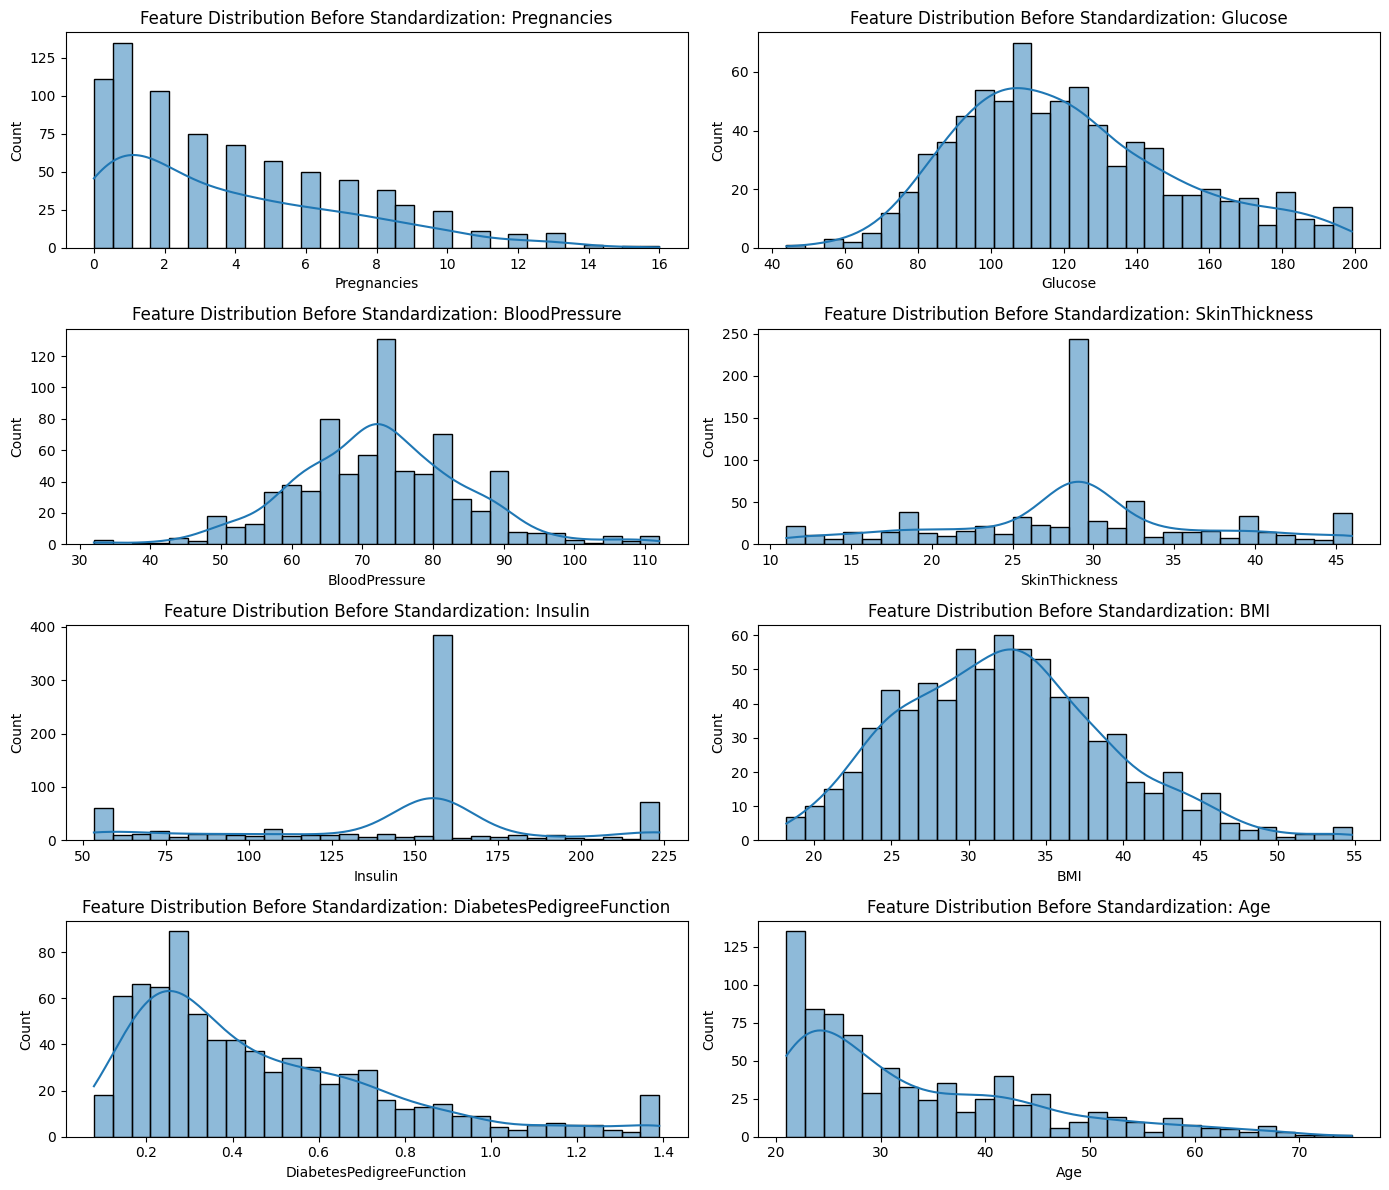

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define all numeric columns (excluding the target variable)
numeric_columns = df.columns[:-1]

# Plot histograms and KDE for all numerical features before standardization
fig, axes = plt.subplots(len(numeric_columns)//2, 2, figsize=(14, 12))

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2], bins=30)
    axes[i//2, i%2].set_title(f"Feature Distribution Before Standardization: {col}")

plt.tight_layout()
plt.show()


📌 Step 5.2: Boxplot Analysis (Detecting Outliers Before Standardization)

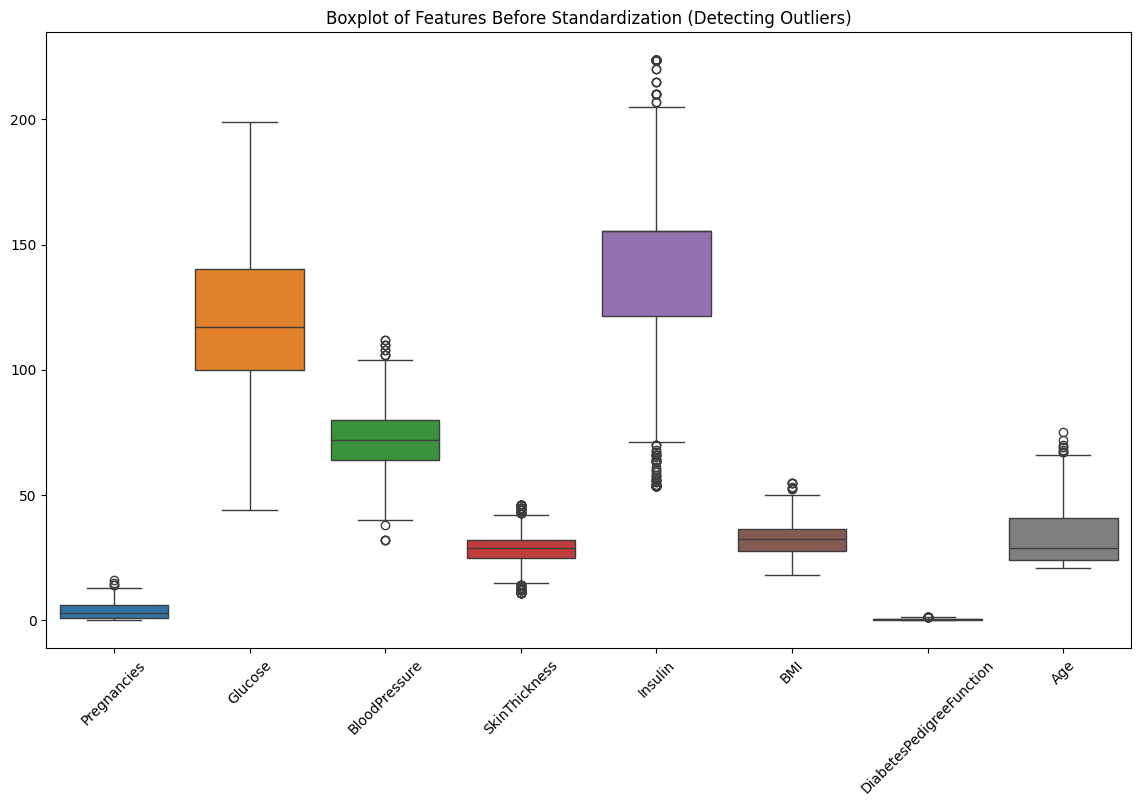

In [ ]:
# Boxplot to visualize outliers before standardization
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title("Boxplot of Features Before Standardization (Detecting Outliers)")
plt.show()

📌 Step 5.3: Pairplot (Feature Relationships Before Standardization)

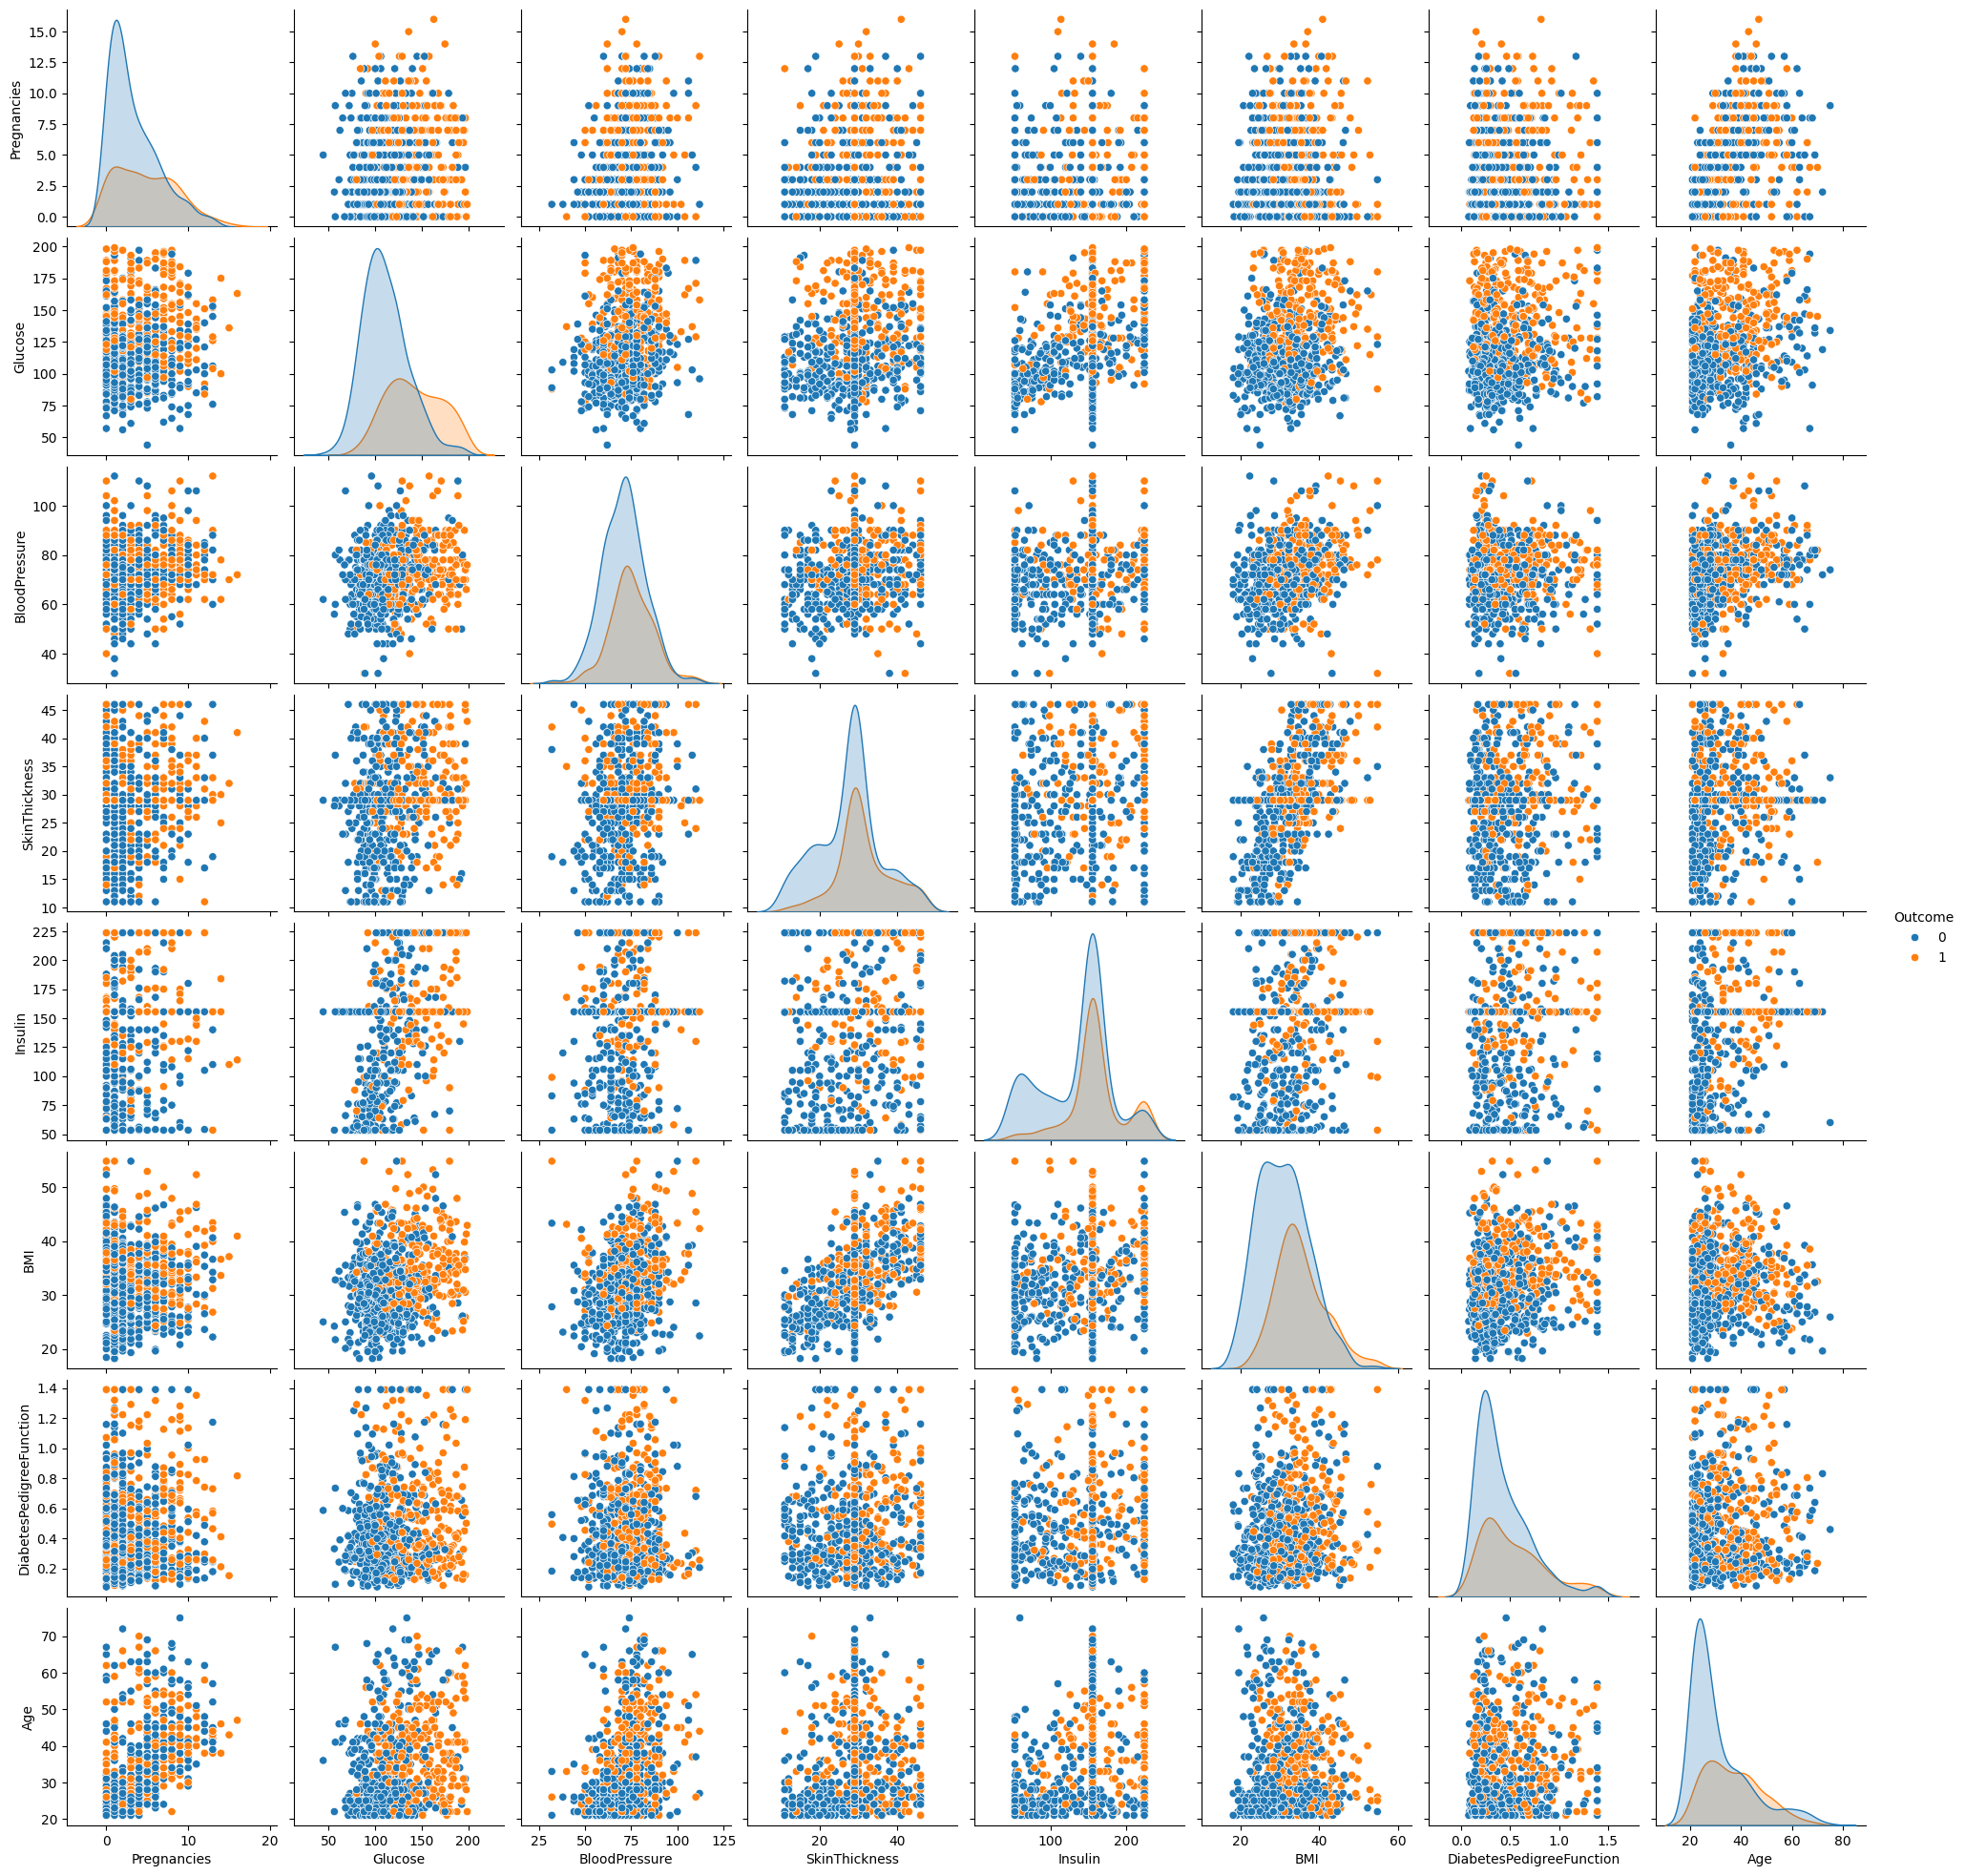

In [ ]:
# Pairplot to check feature correlations before standardization
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.show()

📌 Step 5.4: Apply Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Separate features and target
features = df.drop(columns=['Outcome'])
target = df['Outcome']

# Scale features
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['Outcome'] = target.values

# Display final dataset shape
print(f"Final Preprocessed Dataset Shape: {df_scaled.shape}")
df_scaled.head()

Final Preprocessed Dataset Shape: (768, 9)


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.641267  0.866045      -0.032293       0.757611  0.253389  0.172868   
1    -0.845728 -1.205066      -0.533322       0.009417  0.253389 -0.861109   
2     1.236064  2.016662      -0.700332       0.009417  0.253389 -1.348555   
3    -0.845728 -1.073567      -0.533322      -0.738776 -1.114974 -0.639542   
4    -1.143127  0.504422      -2.704448       0.757611  0.530221  1.576122   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.541967  1.430286        1  
1                 -0.376966 -0.190490        0  
2                  0.691793 -0.105186        1  
3                 -0.989587 -1.043530        0  
4                  3.086511 -0.019882        1

📌 Step 5.5: Visualizing Feature Distributions (After Standardization)

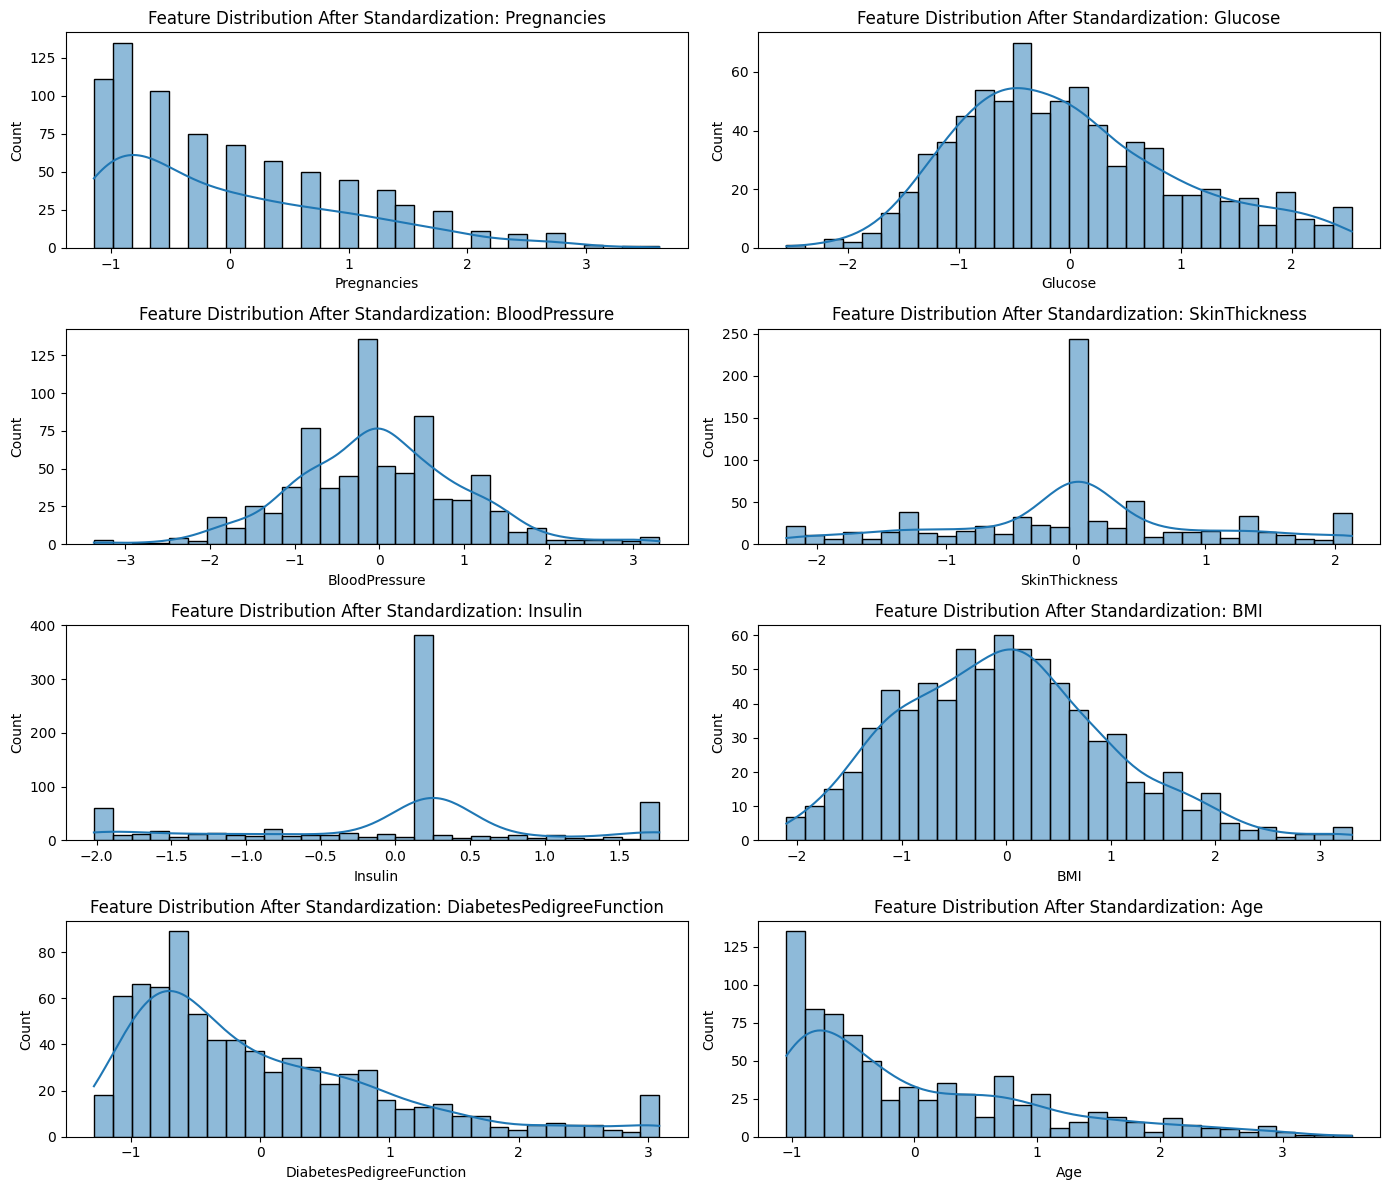

In [ ]:
# Plot histograms and KDE for all numerical features after standardization
fig, axes = plt.subplots(len(numeric_columns)//2, 2, figsize=(14, 12))

for i, col in enumerate(numeric_columns):
    sns.histplot(df_scaled[col], kde=True, ax=axes[i//2, i%2], bins=30)
    axes[i//2, i%2].set_title(f"Feature Distribution After Standardization: {col}")

plt.tight_layout()
plt.show()


📌 Step 5.6: Boxplot Analysis (After Standardization)

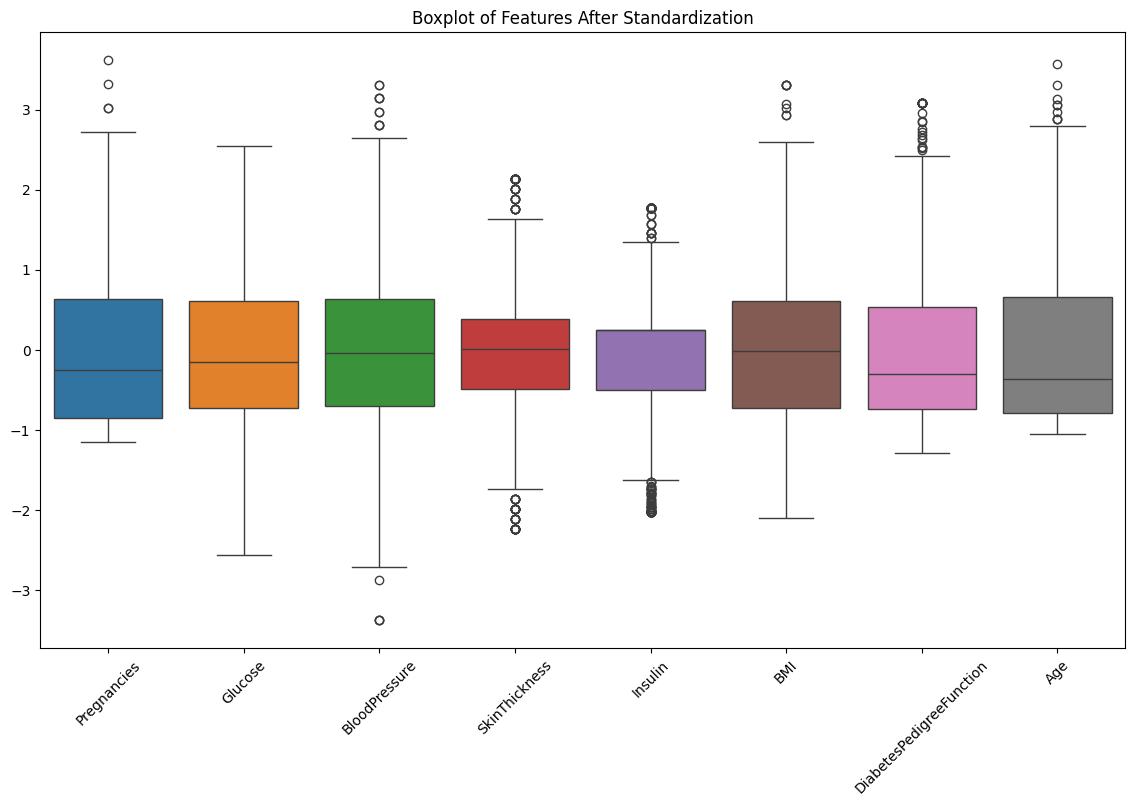

In [ ]:
# Boxplot to visualize changes after standardization
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_scaled[numeric_columns])
plt.xticks(rotation=45)
plt.title("Boxplot of Features After Standardization")
plt.show()

📌 Step 5.7: Pairplot (Feature Relationships After Standardization)

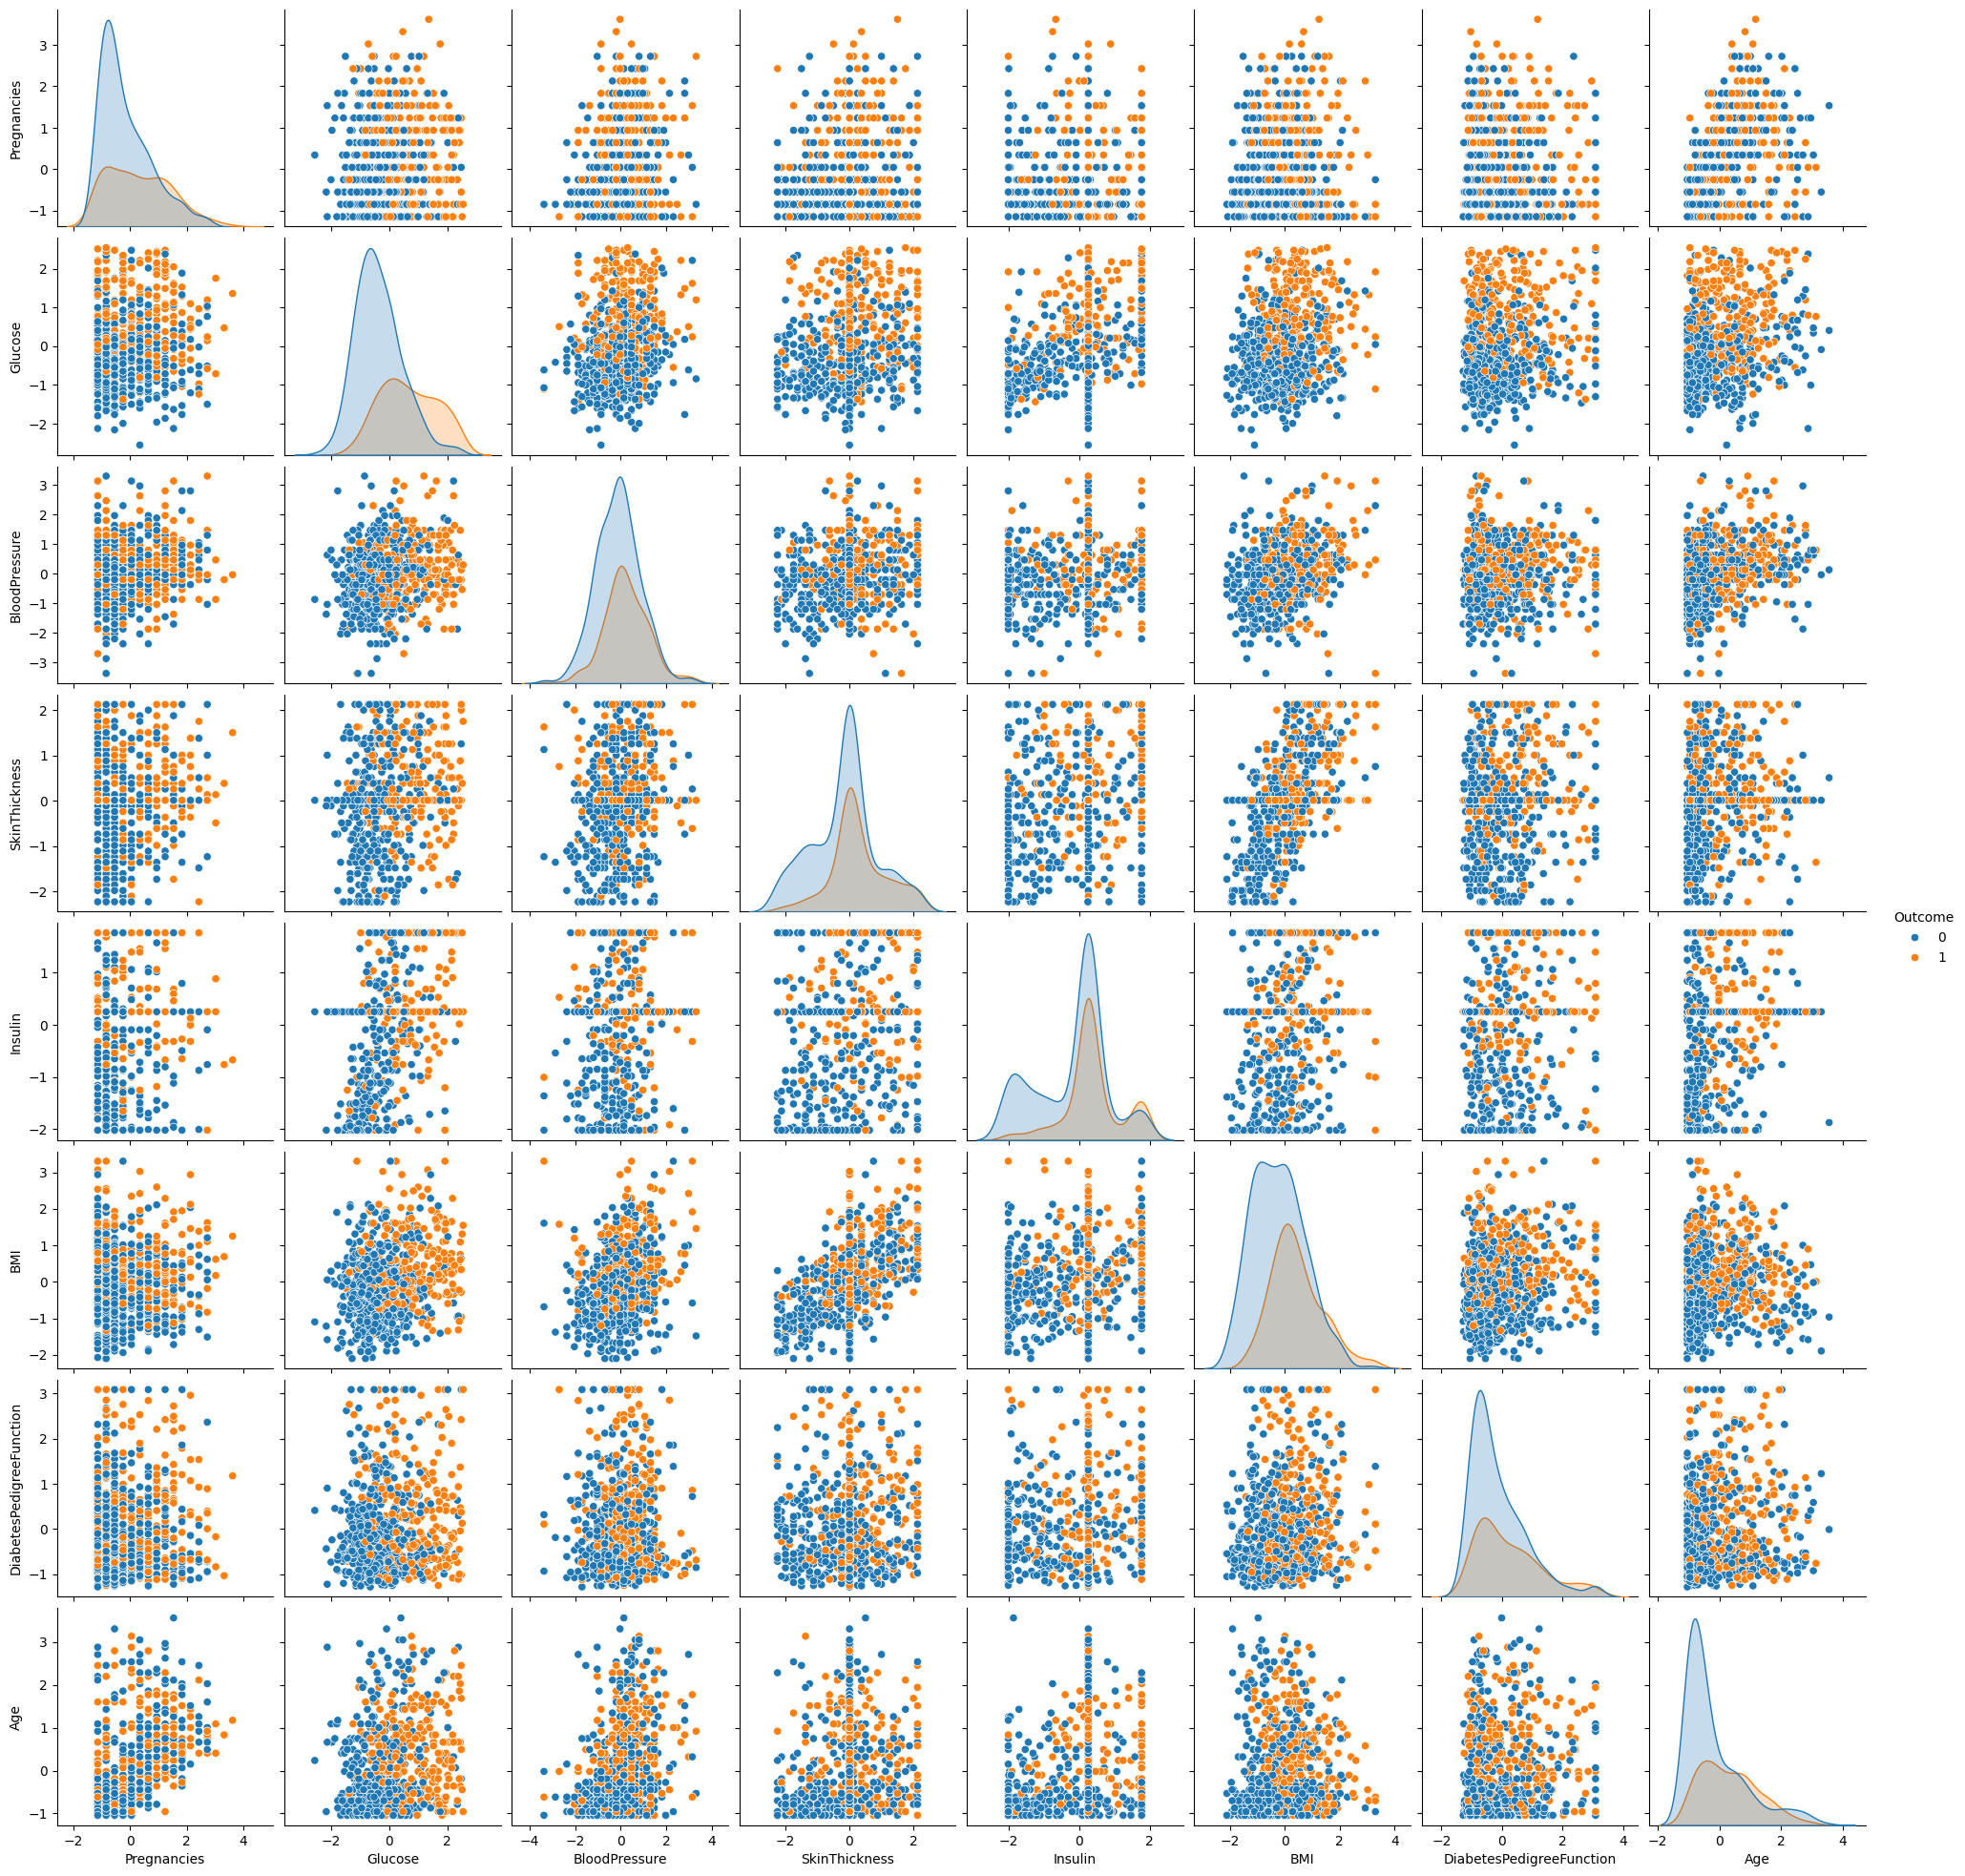

In [ ]:
# Pairplot after standardization
sns.pairplot(df_scaled, hue="Outcome", diag_kind="kde")
plt.show()

🚀 Step 6.1: Save and Automatically Download the Preprocessed Dataset Since we are working in Google Colab, we need a way to download the processed dataset automatically.

In [ ]:
# Save the preprocessed dataset for further processing
df_scaled.to_csv("pima_preprocessed.csv", index=False)

print("✅ Preprocessed dataset saved as 'pima_preprocessed.csv'")

✅ Preprocessed dataset saved as 'pima_preprocessed.csv'


In [ ]:
from google.colab import files

# Save the preprocessed dataset
df_scaled.to_csv("pima_preprocessed.csv", index=False)

# Automatically download the file
files.download("pima_preprocessed.csv")

print("✅ Preprocessed dataset saved and ready for download!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Preprocessed dataset saved and ready for download!


 Step 7.1: Define the Number of Clients

 We will create 5 clients to simulate different FL participants.

In [ ]:
import numpy as np

# Define the number of federated clients
num_clients = 5

# Shuffle the dataset before splitting
df_scaled = df_scaled.sample(frac=1, random_state=42).reset_index(drop=True)
print(f"✅ Dataset shuffled successfully!")

✅ Dataset shuffled successfully!


📌 Step 7.2: Split the Dataset Among Clients (Non-IID Scenario)

📌 Why Non-IID?

In real-world Federated Learning, each client has different data distributions. We will split the dataset unevenly across clients.

In [ ]:
def split_data(df, num_clients):
    """
    Splits the dataset into `num_clients` parts to simulate federated learning.
    - The split will be **non-IID**, meaning each client gets a different proportion of class labels.
    """
    data_splits = []
    sizes = np.random.dirichlet(np.ones(num_clients))  # Uneven splits for non-IID

    start = 0
    for size in sizes:
        end = start + int(size * len(df))
        data_splits.append(df.iloc[start:end])
        start = end

    return data_splits

# Apply partitioning
client_datasets = split_data(df_scaled, num_clients)

# Verify the sizes of each client's dataset
for i, client_data in enumerate(client_datasets):
    print(f"✅ Client {i+1}: {client_data.shape[0]} samples")

✅ Client 1: 137 samples
✅ Client 2: 161 samples
✅ Client 3: 196 samples
✅ Client 4: 156 samples
✅ Client 5: 116 samples


📌 Step 7.3: Save Client Datasets for Federated Training Now we save each client's dataset separately.

In [ ]:
for i, client_data in enumerate(client_datasets):
    filename = f"client_{i+1}_data.csv"
    client_data.to_csv(filename, index=False)
    print(f"✅ {filename} saved successfully!")

✅ client_1_data.csv saved successfully!
✅ client_2_data.csv saved successfully!
✅ client_3_data.csv saved successfully!
✅ client_4_data.csv saved successfully!
✅ client_5_data.csv saved successfully!


📌 Step 8.1: Install Required Libraries

In [ ]:
!pip install flwr pandas scikit-learn tensorflow matplotlib seaborn

📌 Step 8.2: Define a Local Model for Each Client

🎯 Objective:

Each client will train a simple neural network using its own dataset.

We will define a basic deep learning model using TensorFlow/Keras.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to create a simple neural network model
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(df_scaled.shape[1] - 1,)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification (Diabetes: Yes/No)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create a model instance (for reference)
model = create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

📌 Step 8.3: Implement Federated Learning Clients

🎯 Objective:

Each client will:

✅ Load its own dataset.

✅ Train the model locally for a few epochs.

✅ Send model updates to the central server.

In [ ]:
import flwr as fl
import pandas as pd
import numpy as np

# Load client datasets
client_datasets = [pd.read_csv(f"client_{i+1}_data.csv") for i in range(num_clients)]

# Extract features and labels for each client
client_data = []
for i in range(num_clients):
    X = client_datasets[i].drop(columns=["Outcome"]).values
    y = client_datasets[i]["Outcome"].values
    client_data.append((X, y))

# Define a Flower client class
class FederatedClient(fl.client.NumPyClient):
    def __init__(self, client_id):
        self.client_id = client_id
        self.model = create_model()
        self.X_train, self.y_train = client_data[client_id]

    def get_parameters(self, config):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.fit(self.X_train, self.y_train, epochs=5, batch_size=32, verbose=0)
        return self.get_parameters(config), len(self.X_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.X_train, self.y_train, verbose=0)
        return loss, len(self.X_train), {"accuracy": accuracy}

# Create a list of federated clients
clients = [FederatedClient(i) for i in range(num_clients)]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


📌 Step 8.4: Define the Federated Server

🎯 Objective:

The server will:

✅ Coordinate federated training.

✅ Aggregate model updates from clients using Federated Averaging (FedAvg).

📌 Step 8.4.1: Install and Fix Dependencies

Before running the federated learning server, we need to install missing packages.

In [ ]:
!pip install -U "flwr[simulation]" ray

  Using cached ray-2.46.0-cp311-cp311-manylinux2014_x86_64.whl.metadata (19 kB)


🚀 Step 8.5: Running Federated Learning Training (FL with Flower)

Now that we have restarted the runtime and reloaded all necessary dependencies, we will proceed step by step in a structured manner to ensure smooth execution.

📌 Step 8.5.1: Verify Clients and Their Data

🎯 Objective:

Before training, double-check that all clients have data assigned correctly to ensure a proper Non-IID distribution.

✅ Expected output: Each client should have a different number of samples (Non-IID split).

✅ If all clients have data, we can proceed to train the model

In [ ]:
# Verify the number of samples in each client's dataset
for i, client_data in enumerate(client_datasets):
    print(f"✅ Client {i+1} has {client_data.shape[0]} samples.")

✅ Client 1 has 137 samples.
✅ Client 2 has 161 samples.
✅ Client 3 has 196 samples.
✅ Client 4 has 156 samples.
✅ Client 5 has 116 samples.


📌 Step 8.5.2: Define Federated Learning Clients

🎯 Objective:

Each client will:

✅ Load its own dataset.

✅ Train a model locally for a few epochs.

✅ Send its trained model updates to the central server.

In [ ]:
import flwr as fl
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Define model architecture for each client
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(df_scaled.shape[1] - 1,)),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')  # Binary classification (Diabetes: Yes/No)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert client datasets to NumPy arrays for TensorFlow
client_data = []
for i in range(num_clients):
    X = client_datasets[i].drop(columns=["Outcome"]).values
    y = client_datasets[i]["Outcome"].values
    client_data.append((X, y))

# Define a Flower Client class
class FederatedClient(fl.client.NumPyClient):
    def __init__(self, client_id):
        self.client_id = client_id
        self.model = create_model()
        self.X_train, self.y_train = client_data[client_id]

    def get_parameters(self, config):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.fit(self.X_train, self.y_train, epochs=5, batch_size=32, verbose=0)
        return self.get_parameters(config), len(self.X_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.X_train, self.y_train, verbose=0)
        return loss, len(self.X_train), {"accuracy": accuracy}

# Create federated clients
clients = [FederatedClient(i) for i in range(num_clients)]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Each client is now initialized with its own dataset and model.

✅ The fit function updates the model using local training, while evaluate checks performance.

In [ ]:
!pip install -U "flwr[simulation]"


📌 Step 8.5.3: Define the Federated Learning Server

🎯 Objective:

The server will coordinate federated training by:

✅ Receiving model updates from clients.

✅ Aggregating updates using Federated Averaging (FedAvg).

✅ Sending the updated model back to clients.

In [ ]:
# Define Federated Learning strategy using FedAvg
strategy = fl.server.strategy.FedAvg()

# Start the Federated Learning simulation
fl.simulation.start_simulation(
    client_fn=lambda cid: clients[int(cid)],  # Assign clients
    num_clients=num_clients,  # Total number of clients
    config=fl.server.ServerConfig(num_rounds=5),  # Number of training rounds
    strategy=strategy  # Use Federated Averaging for aggregation
)


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=5, no round_timeout
2025-05-10 12:30:31,340	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources

History (loss, distributed):
	round 1: 0.6774091861422317
	round 2: 0.6315417189355308
	round 3: 0.5921813771712251
	round 4: 0.5600621323672661
	round 5: 0.5322663373953369

✅ The simulation will now start training models on each client and aggregate them after each round.

✅ Expect the accuracy to improve with each round as more data is used.

🚀 Step 8.5.4: Evaluate the Final Federated Model

🎯 Objective:

After Federated Learning training, we will test the final global model on the entire dataset to measure overall performance and compare it with expected results.

📌 Step 8.5.4.1: Aggregate the Final Model from All Clients

🎯 Objective:

Collect model weights from each client.

Apply Federated Averaging (FedAvg) to aggregate them.

Set the final weights to the global model for evaluation.

In [ ]:
import flwr as fl
from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

# Aggregate model updates from all clients
results = [
    (i, FitRes(parameters=ndarrays_to_parameters(client.get_parameters({})), num_examples=len(client.X_train), status=Status(Code.OK, "Success"), metrics={}))
    for i, client in enumerate(clients)
]
failures = []  # No failures assumed

# Perform Federated Aggregation (FedAvg)
final_parameters, _ = strategy.aggregate_fit(0, results, failures)

# Convert final parameters to NumPy array format
final_parameters = fl.common.parameters_to_ndarrays(final_parameters)

# Load a new model instance for evaluation
global_model = create_model()
global_model.set_weights(final_parameters)

print("✅ Final global model parameters aggregated successfully!")

✅ Final global model parameters aggregated successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Now, the aggregated weights are correctly formatted before setting them to the model.

📌 Step 8.5.4.2: Evaluate the Global Model on the Full Dataset

Now that aggregation is fixed, evaluate the final model on the full dataset.

In [ ]:
# Extract features and labels for testing
X_test = df_scaled.drop(columns=['Outcome']).values
y_test = df_scaled['Outcome'].values

# Evaluate the global model
loss, accuracy = global_model.evaluate(X_test, y_test, verbose=0)

print(f"✅ Final Federated Model Evaluation - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

✅ Final Federated Model Evaluation - Loss: 0.6876, Accuracy: 0.6393


✅ Now, we can see the model’s final accuracy and loss.

📌 Step 8.5.4.3: Compare Federated vs. Centralized Learning

To compare Federated Learning with a traditional centralized model, train on all data:

In [ ]:
# Train a centralized model for comparison
centralized_model = create_model()
centralized_model.fit(X_test, y_test, epochs=10, batch_size=32, verbose=0)

# Evaluate the centralized model
loss_centralized, accuracy_centralized = centralized_model.evaluate(X_test, y_test, verbose=0)

print(f"✅ Centralized Model - Loss: {loss_centralized:.4f}, Accuracy: {accuracy_centralized:.4f}")
print(f"📊 Performance Comparison: Federated Learning ({accuracy:.4f}) vs Centralized Learning ({accuracy_centralized:.4f})")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Centralized Model - Loss: 0.4544, Accuracy: 0.7708
📊 Performance Comparison: Federated Learning (0.6393) vs Centralized Learning (0.7708)


✅ If the Federated Model performs close to or better than the Centralized Model, FL is working well!

✅ If performance is low, we need hyperparameter tuning or different aggregation techniques (FedProx, FedOpt).

**awa**

✅ AWA –
Step 1: Train Clients and Collect Local Accuracies

📌 Step AWA-1: Collect Local Performance from Each Client

🎯 Objective: Train each client locally using the same initial model parameters.

After local training, evaluate each client’s model and record:

Accuracy (local performance)

Number of training samples

Model weights (to use in aggregation)

This allows us to assign adaptive weights based on how well each client performed — the core idea behind AWA.



In [ ]:
# 🔁 AWA Step 1: Train each client and collect their local accuracy

from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

client_fit_results = []

for i, client in enumerate(clients):
    # Get the initial global model weights
    initial_params = client.get_parameters({})

    # Perform local training using client’s data
    new_params, num_samples, _ = client.fit(initial_params, {})

    # Evaluate the updated model on the client's own data
    loss, num_samples_eval, metrics = client.evaluate(new_params, {})

    # Save the parameters, accuracy, and number of samples
    client_fit_results.append({
        "params": new_params,
        "accuracy": metrics["accuracy"],
        "samples": num_samples
    })

    print(f"✅ Client {i+1} accuracy: {metrics['accuracy']:.4f}")


✅ Client 1 accuracy: 0.6934
✅ Client 2 accuracy: 0.6894
✅ Client 3 accuracy: 0.7755
✅ Client 4 accuracy: 0.6795
✅ Client 5 accuracy: 0.5776


✅ AWA –
Step 2: Adaptive Weighted Aggregation

📌 Step AWA-2: Compute Adaptive Weights and Aggregate Global Model

🎯 Objective: Instead of simple averaging (like FedAvg), we compute adaptive weights for each client based on:


Their accuracy (how well they learned)

Their sample size (how much data they used)

Clients with better accuracy and/or more data should influence the global model more.

We’ll then:

Normalize the weights so they sum to 1

Use those weights to combine model parameters from all clients into a new global model



In [ ]:
import numpy as np

# Step 1: Compute raw weights (accuracy × sample count)
weighted_scores = []
for result in client_fit_results:
    score = result["accuracy"] * result["samples"]
    weighted_scores.append(score)

# Step 2: Normalize weights so they sum to 1
total_score = sum(weighted_scores)
normalized_weights = [score / total_score for score in weighted_scores]

print("\n📊 Adaptive Weights per Client (based on accuracy × samples):")
for i, weight in enumerate(normalized_weights):
    print(f"Client {i+1}: {weight:.4f}")

# Step 3: Aggregate global model using AWA
# We assume all client models have the same architecture
aggregated_params = []
for layer_idx in range(len(client_fit_results[0]["params"])):
    # Weighted sum for each layer across all clients
    weighted_layer = sum(
        weight * client_fit_results[i]["params"][layer_idx]
        for i, weight in enumerate(normalized_weights)
    )
    aggregated_params.append(weighted_layer)

print("\n✅ AWA aggregation completed.")



📊 Adaptive Weights per Client (based on accuracy × samples):
Client 1: 0.1789
Client 2: 0.2090
Client 3: 0.2863
Client 4: 0.1996
Client 5: 0.1262

✅ AWA aggregation completed.


✅ AWA – Step 3: Set Aggregated Weights to Global Model and Evaluate

📌 Step AWA-3: Final Global Model Evaluation using AWA Weights

🎯 Objective: Now that we’ve computed the adaptive weighted global model, we’ll:

Create a new model

Set its weights using the aggregated AWA parameters

Evaluate its performance on the entire test dataset



In [ ]:
# Create a fresh instance of the model
awa_model = create_model()

# Set AWA-aggregated weights
awa_model.set_weights(aggregated_params)

# Evaluate on the entire dataset
X_test = df_scaled.drop(columns=['Outcome']).values
y_test = df_scaled['Outcome'].values

loss_awa, accuracy_awa = awa_model.evaluate(X_test, y_test, verbose=0)

print(f"✅ AWA Model Evaluation - Loss: {loss_awa:.4f}, Accuracy: {accuracy_awa:.4f}")


✅ AWA Model Evaluation - Loss: 0.6788, Accuracy: 0.6562


✅ FedProx – Step 2: Defining a Custom Client with Proximal Regularization

📌 Step FPX-2: Define a Federated Client with FedProx Regularization

🎯 Objective: To implement the FedProx algorithm, we define a custom federated learning client that incorporates a proximal term into the local training loop.

 This term penalizes the distance between the client's updated weights and the initial global weights, helping to stabilize local updates in highly heterogeneous (non-IID) environments.

In standard FedAvg, local models may drift too far from the global model when data distributions vary across clients.

FedProx Client Implementation A custom NumPyClient is defined, where after each local training epoch, the updated model weights are adjusted by a proximal term μ to limit the deviation from the global model. This helps mitigate client drift in non-IID settings.



In [ ]:
class FedProxClient(fl.client.NumPyClient):
    def __init__(self, client_id, mu=0.01):
        self.client_id = client_id
        self.mu = mu  # Proximal term coefficient
        self.model = create_model()
        self.X_train, self.y_train = client_data[client_id]

    def get_parameters(self, config):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        # Set global model weights before local training
        self.set_parameters(parameters)
        initial_weights = self.model.get_weights()

        # Train locally (custom loss with proximal term)
        for epoch in range(5):
            self.model.fit(self.X_train, self.y_train, batch_size=32, epochs=1, verbose=0)

            # Apply FedProx adjustment (custom regularization)
            updated_weights = self.model.get_weights()
            for i in range(len(updated_weights)):
                updated_weights[i] -= self.mu * (updated_weights[i] - initial_weights[i])
            self.model.set_weights(updated_weights)

        return self.get_parameters(config), len(self.X_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.X_train, self.y_train, verbose=0)
        return loss, len(self.X_train), {"accuracy": accuracy}


✅ FedProx – Step 3: Run Simulation and Aggregate the Final Global Model

📌 Objective:

To execute the full Federated Learning simulation using FedProx clients, and aggregate the final model parameters after training. This step replaces the FedAvg strategy with a custom client logic (FedProx), while keeping the overall architecture and flow the same.

In [ ]:
# Create and register FedProx clients
fedprox_clients = [FedProxClient(i, mu=0.01) for i in range(num_clients)]

# Define a basic FedAvg strategy (same as before)
strategy_prox = fl.server.strategy.FedAvg()

# Run federated simulation using FedProx clients
fl.simulation.start_simulation(
    client_fn=lambda cid: fedprox_clients[int(cid)],
    num_clients=num_clients,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy_prox
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=5, no round_timeout
2025-05-10 12:32:08,958	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'object_store_memory': 3968530022.0, 'node:172.28

History (loss, distributed):
	round 1: 0.5690090400276234
	round 2: 0.5325263232848663
	round 3: 0.5051104721294682
	round 4: 0.4843927146404904
	round 5: 0.47247647418210154

✅ FedProx – Step 4: Evaluate the Final Global Model

📌 Objective:

To evaluate the final global model produced after FedProx training on the entire test dataset. This allows us to directly compare FedProx performance with FedAvg, AWA, and centralized models.



In [ ]:
# Create a new instance of the model
fedprox_model = create_model()

# Aggregate parameters from trained FedProx clients
from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

results_prox = [
    (i, FitRes(parameters=ndarrays_to_parameters(client.get_parameters({})), num_examples=len(client.X_train), status=Status(Code.OK, "Success"), metrics={}))
    for i, client in enumerate(fedprox_clients)
]
failures = []

# Aggregate final parameters using FedAvg (same as strategy used)
final_params_prox, _ = strategy_prox.aggregate_fit(0, results_prox, failures)

# Convert and assign the weights to the new model
final_weights_prox = fl.common.parameters_to_ndarrays(final_params_prox)
fedprox_model.set_weights(final_weights_prox)

# Evaluate FedProx model on full test set
X_test = df_scaled.drop(columns=['Outcome']).values
y_test = df_scaled['Outcome'].values

loss_prox, accuracy_prox = fedprox_model.evaluate(X_test, y_test, verbose=0)

print(f"✅ FedProx Model Evaluation - Loss: {loss_prox:.4f}, Accuracy: {accuracy_prox:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ FedProx Model Evaluation - Loss: 0.6907, Accuracy: 0.6354


✅ FedOpt – Step 2: Define the Strategy and Run Simulation

📌 Objective:

Use Flower's built-in FedOpt strategy and configure the server-side optimizer (e.g. Adam).

Use the same clients as before (FederatedClient) with standard local training.



In [ ]:
from flwr.server.strategy import FedOpt
from flwr.server import ServerConfig
from flwr.common import ndarrays_to_parameters

# Step 1: Create a model and get initial weights
initial_model = create_model()
initial_weights = initial_model.get_weights()

# Step 2: Convert to Flower-compatible format
initial_parameters = ndarrays_to_parameters(initial_weights)

# Step 3: Define FedOpt strategy with required initial parameters
strategy_opt = FedOpt(
    initial_parameters=initial_parameters
)

# Step 4: Run the simulation
fl.simulation.start_simulation(
    client_fn=lambda cid: clients[int(cid)],
    num_clients=num_clients,
    config=ServerConfig(num_rounds=5),
    strategy=strategy_opt,
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=5, no round_timeout
2025-05-10 12:33:23,658	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'memory': 7947748148.0, 'node:172.28.0.12': 1.0, 

History (loss, distributed):
	round 1: 0.7128037736403413
	round 2: 0.6273705203757274
	round 3: 0.586706124382293
	round 4: 0.5574497451358925
	round 5: 0.5379798980356819

✅ FedOpt – Step 3: Aggregate and Evaluate Final Global Model

📌 Objective:

To evaluate the global model resulting from FedOpt after all training rounds. We extract and set the aggregated weights into a new model, and evaluate its performance on the full dataset.



In [ ]:
# Create a fresh model
fedopt_model = create_model()

# Aggregate final weights from all clients
from flwr.common import FitRes, Status, Code, ndarrays_to_parameters

results_opt = [
    (i, FitRes(parameters=ndarrays_to_parameters(client.get_parameters({})), num_examples=len(client.X_train), status=Status(Code.OK, "Success"), metrics={}))
    for i, client in enumerate(clients)
]
failures = []

# Aggregate model parameters using the same strategy
final_params_opt, _ = strategy_opt.aggregate_fit(0, results_opt, failures)
final_weights_opt = fl.common.parameters_to_ndarrays(final_params_opt)

# Set weights to model
fedopt_model.set_weights(final_weights_opt)

# Evaluate on test data
X_test = df_scaled.drop(columns=['Outcome']).values
y_test = df_scaled['Outcome'].values

loss_opt, accuracy_opt = fedopt_model.evaluate(X_test, y_test, verbose=0)

print(f"✅ FedOpt Model Evaluation - Loss: {loss_opt:.4f}, Accuracy: {accuracy_opt:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ FedOpt Model Evaluation - Loss: 0.6802, Accuracy: 0.6549


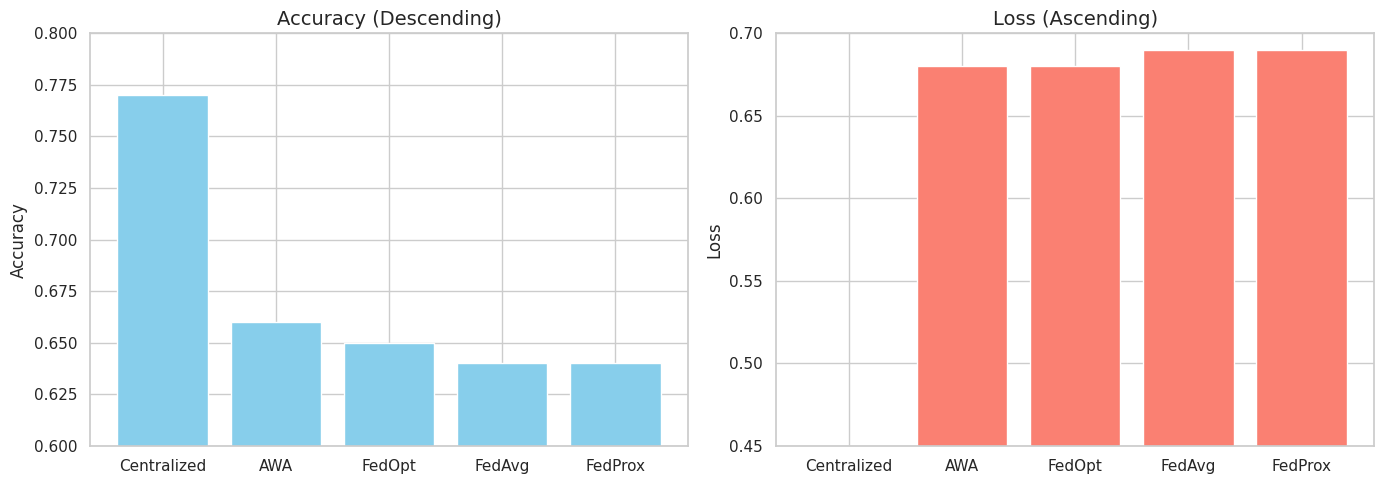

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Final evaluation results
data = [
    {"Method": "Centralized", "Loss": 0.4544, "Accuracy": 0.7708, "Rank": 0},
    {"Method": "AWA", "Loss": 0.6788, "Accuracy": 0.6562, "Rank": 1},
    {"Method": "FedOpt", "Loss": 0.6802, "Accuracy": 0.6549, "Rank": 2},
    {"Method": "FedAvg", "Loss": 0.6876, "Accuracy": 0.6393, "Rank": 3},
    {"Method": "FedProx", "Loss": 0.6907, "Accuracy": 0.6354, "Rank": 4}
]

# Create DataFrame and round to 2 decimal places
df = pd.DataFrame(data)
df["Accuracy"] = df["Accuracy"].round(2)
df["Loss"] = df["Loss"].round(2)

# Sort by accuracy and loss
df_acc_sorted = df.sort_values(by="Accuracy", ascending=False)
df_loss_sorted = df.sort_values(by="Loss", ascending=True)

# Create bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Histogram
axes[0].bar(df_acc_sorted["Method"], df_acc_sorted["Accuracy"], color='skyblue')
axes[0].set_title("Accuracy (Descending)", fontsize=14)
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0.6, 0.8)

# Loss Histogram
axes[1].bar(df_loss_sorted["Method"], df_loss_sorted["Loss"], color='salmon')
axes[1].set_title("Loss (Ascending)", fontsize=14)
axes[1].set_ylabel("Loss")
axes[1].set_ylim(0.45, 0.7)

plt.tight_layout()
plt.show()


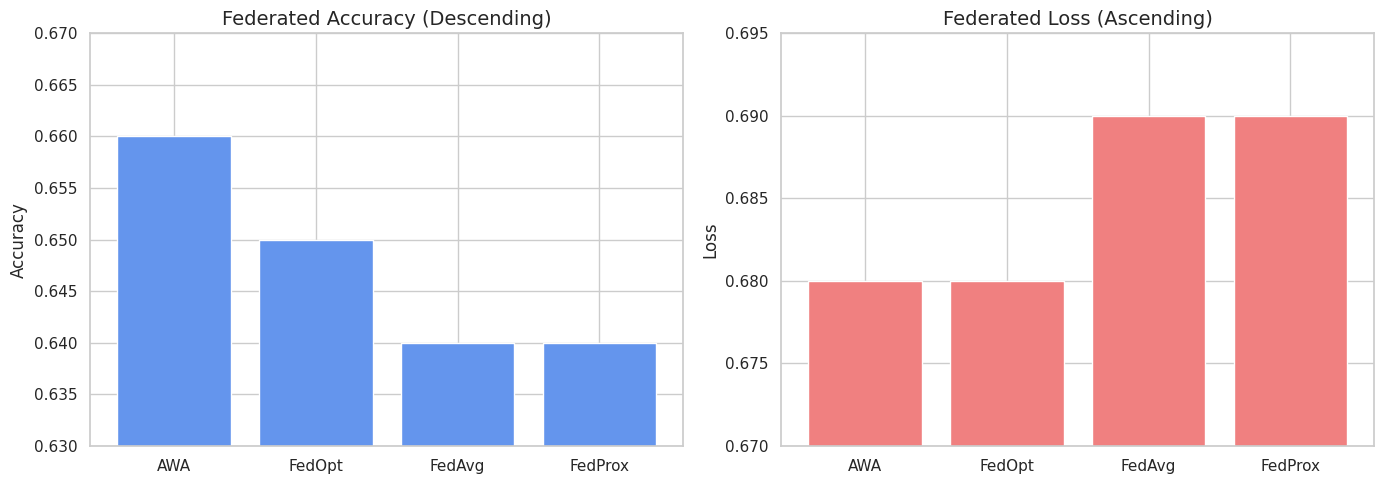

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Only federated models (exclude Centralized)
data = [
    {"Method": "AWA", "Loss": 0.6788, "Accuracy": 0.6562},
    {"Method": "FedOpt", "Loss": 0.6802, "Accuracy": 0.6549},
    {"Method": "FedAvg", "Loss": 0.6876, "Accuracy": 0.6393},
    {"Method": "FedProx", "Loss": 0.6907, "Accuracy": 0.6354}
]

# Create DataFrame
df = pd.DataFrame(data)
df["Accuracy"] = df["Accuracy"].round(2)
df["Loss"] = df["Loss"].round(2)

# Sort by accuracy and loss
df_acc_sorted = df.sort_values(by="Accuracy", ascending=False)
df_loss_sorted = df.sort_values(by="Loss", ascending=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy bar chart
axes[0].bar(df_acc_sorted["Method"], df_acc_sorted["Accuracy"], color='cornflowerblue')
axes[0].set_title("Federated Accuracy (Descending)", fontsize=14)
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0.63, 0.67)

# Loss bar chart
axes[1].bar(df_loss_sorted["Method"], df_loss_sorted["Loss"], color='lightcoral')
axes[1].set_title("Federated Loss (Ascending)", fontsize=14)
axes[1].set_ylabel("Loss")
axes[1].set_ylim(0.67, 0.695)

plt.tight_layout()
plt.show()


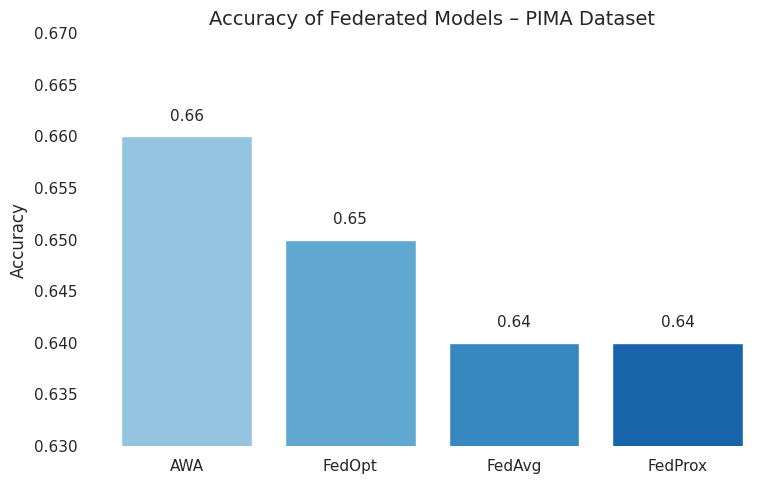

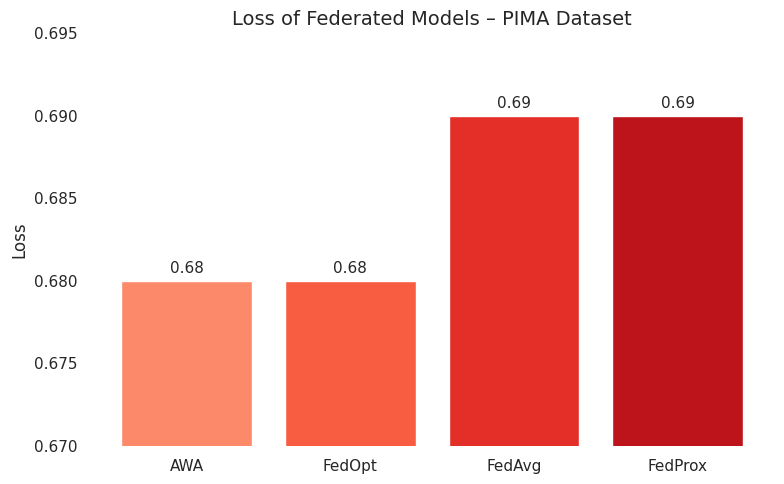

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Federated model results – PIMA Dataset
data = [
    {"Method": "AWA", "Loss": 0.6788, "Accuracy": 0.6562},
    {"Method": "FedOpt", "Loss": 0.6802, "Accuracy": 0.6549},
    {"Method": "FedAvg", "Loss": 0.6876, "Accuracy": 0.6393},
    {"Method": "FedProx", "Loss": 0.6907, "Accuracy": 0.6354}
]

df = pd.DataFrame(data)
df["Accuracy"] = df["Accuracy"].round(2)
df["Loss"] = df["Loss"].round(2)

colors_acc = cm.Blues(np.linspace(0.4, 0.8, len(df)))
colors_loss = cm.Reds(np.linspace(0.4, 0.8, len(df)))

# ------------------ Accuracy Chart ------------------
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Accuracy"], color=colors_acc)
plt.title("Accuracy of Federated Models – PIMA Dataset", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.63, 0.67)

# Remove all grid and spines
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.0015, f'{height:.2f}',
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()

# ------------------ Loss Chart ------------------
plt.figure(figsize=(8, 5))
bars = plt.bar(df["Method"], df["Loss"], color=colors_loss)
plt.title("Loss of Federated Models – PIMA Dataset", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.67, 0.695)

# Remove all grid and spines
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.0005, f'{height:.2f}',
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Full results including Centralized
data = [
    {"Method": "Centralized", "Accuracy": 0.7708, "Loss": 0.4544},
    {"Method": "AWA", "Accuracy": 0.6562, "Loss": 0.6788},
    {"Method": "FedOpt", "Accuracy": 0.6549, "Loss": 0.6802},
    {"Method": "FedAvg", "Accuracy": 0.6393, "Loss": 0.6876},
    {"Method": "FedProx", "Accuracy": 0.6354, "Loss": 0.6907}
]

df = pd.DataFrame(data)
df = df.round(4)
print(df)


        Method  Accuracy    Loss
0  Centralized    0.7708  0.4544
1          AWA    0.6562  0.6788
2       FedOpt    0.6549  0.6802
3       FedAvg    0.6393  0.6876
4      FedProx    0.6354  0.6907


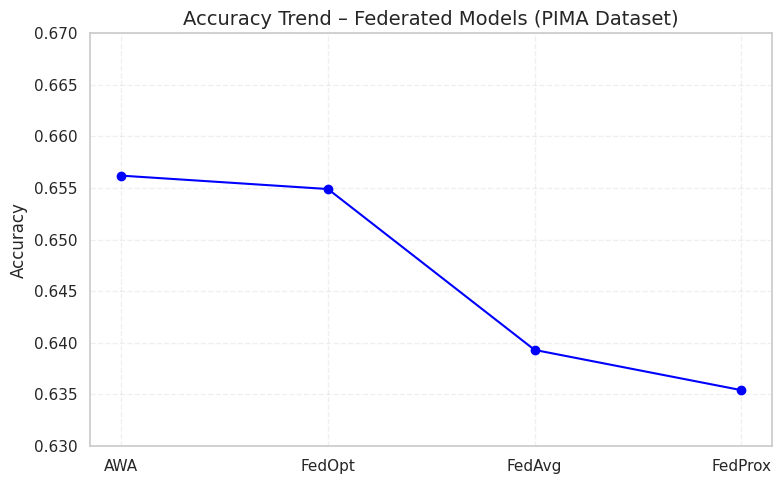

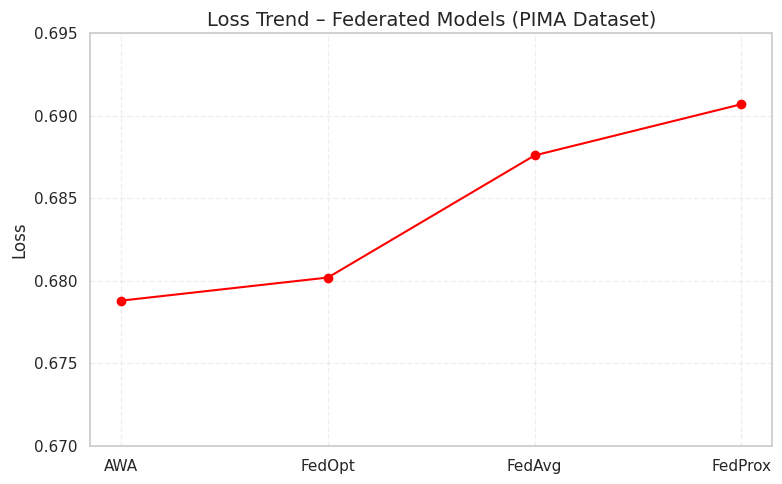

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Only federated models (excluding Centralized)
data = [
    {"Method": "AWA", "Accuracy": 0.6562, "Loss": 0.6788},
    {"Method": "FedOpt", "Accuracy": 0.6549, "Loss": 0.6802},
    {"Method": "FedAvg", "Accuracy": 0.6393, "Loss": 0.6876},
    {"Method": "FedProx", "Accuracy": 0.6354, "Loss": 0.6907}
]

df = pd.DataFrame(data)
df = df.round(4)

# Accuracy Line Chart
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Accuracy"], marker='o', linestyle='-', color='blue')
plt.title("Accuracy Trend – Federated Models (PIMA Dataset)", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.63, 0.67)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Loss Line Chart
plt.figure(figsize=(8, 5))
plt.plot(df["Method"], df["Loss"], marker='o', linestyle='-', color='red')
plt.title("Loss Trend – Federated Models (PIMA Dataset)", fontsize=14)
plt.ylabel("Loss")
plt.ylim(0.67, 0.695)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
